## FIN 666-Advanced Quant Methods and Machine Learning in Finance 
## Homework-8 Solution
### Peter Chika Ozo-ogueji

### The Homework 8 involves building and comparing classification models to predict whether an individual earns more than $50,000 annually based on demographic and employment characteristics. Students are instructed to use a dataset from the 1994 Census containing variables such as age, education, marital status, and sex. The assignment requires creating a binary "HighIncome" variable from the "Salary" column and then implementing three different machine learning models: Logistic Regression, K-Nearest Neighbors, and Support Vector Machine. For each model, students must generate confusion matrices and calculate performance metrics including accuracy, precision, and recall. The models should be trained on 70% of the data and tested on the remaining 30%, using age, education level, hours worked per week, capital gain, and sex as predictors. Finally, students must rank the models based on performance and explain the differences in their effectiveness by analyzing each model's strengths and weaknesses. This assignment provides hands-on experience with fundamental classification algorithms while emphasizing proper model evaluation and comparison techniques.

In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [5]:

# Load the dataset
df = pd.read_csv("HW8_income.csv")

# Display the first few rows to understand the data
print("Dataset preview:")
print(df.head())

# Create the HighIncome variable from Salary
df['HighIncome'] = df['Salary'].map(lambda x: 1 if '>50K' in x else 0)

# Encode the sex variable
le = LabelEncoder()
df['sex_encoded'] = le.fit_transform(df['Sex'])

# Select features and target variable:
X = df[['Age', 'EducationLevel', 'HoursPerWeek', 'CapitalGain', 'sex_encoded']]
y = df['HighIncome']

# Display feature information
print("\nFeature information:")
print(X.describe())

# Check class distribution
print("\nClass distribution (HighIncome):")
print(y.value_counts())
print(f"Percentage of high earners: {y.mean()*100:.2f}%")

# Split the data into train and test sets (70-30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"\nTraining set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

Dataset preview:
   Age          Workclass  FNLWGT      Education  EducationLevel  \
0   62          Local-gov   68268        HS-grad               9   
1   50            Private  215990        HS-grad               9   
2   36            Private  185405        HS-grad               9   
3   64            Private  258006   Some-college              10   
4   28   Self-emp-not-inc   39388      Assoc-voc              11   

         MaritalStatus         Occupation    Relationship    Race      Sex  \
0   Married-civ-spouse   Transport-moving         Husband   White     Male   
1   Married-civ-spouse       Craft-repair         Husband   White     Male   
2   Married-civ-spouse       Adm-clerical         Husband   White     Male   
3              Widowed       Adm-clerical   Not-in-family   White   Female   
4   Married-civ-spouse    Farming-fishing         Husband   White     Male   

   CapitalGain  CapitalLoss  HoursPerWeek   NativeCountry  Salary  
0            0            0          

## a) Logistic Regression Model:


--- Logistic Regression Model ---

Confusion Matrix:
[[880  52]
 [154 114]]


<Figure size 800x600 with 0 Axes>

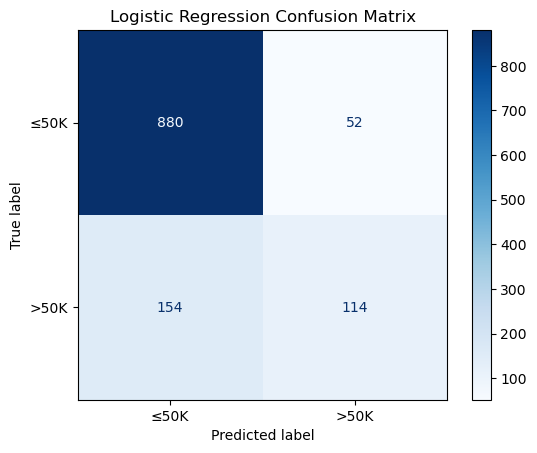


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.94      0.90       932
           1       0.69      0.43      0.53       268

    accuracy                           0.83      1200
   macro avg       0.77      0.68      0.71      1200
weighted avg       0.81      0.83      0.81      1200

Accuracy: 0.8283
Precision (High Income): 0.6867
Recall (High Income): 0.4254
F1 Score (High Income): 0.5253

Feature Importance:
          Feature  Coefficient
4     sex_encoded     1.268390
1  EducationLevel     0.337273
0             Age     0.038742
2    HoursPerWeek     0.035239
3     CapitalGain     0.000323


In [7]:
# Build Logistic Regression model
print("\n--- Logistic Regression Model ---\n")
lr = LogisticRegression(max_iter=1000, random_state=42)
lr.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr.predict(X_test)

# Create confusion matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
print("Confusion Matrix:")
print(cm_lr)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=['≤50K', '>50K'])
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.savefig('lr_confusion_matrix.png')
plt.show()

# Calculate and display metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

lr_report = classification_report(y_test, y_pred_lr, output_dict=True)
lr_accuracy = accuracy_score(y_test, y_pred_lr)
lr_precision = lr_report['1']['precision']
lr_recall = lr_report['1']['recall']
lr_f1 = lr_report['1']['f1-score']

print(f"Accuracy: {lr_accuracy:.4f}")
print(f"Precision (High Income): {lr_precision:.4f}")
print(f"Recall (High Income): {lr_recall:.4f}")
print(f"F1 Score (High Income): {lr_f1:.4f}")

# Display feature importance
feature_names = X.columns
coefficients = lr.coef_[0]
feature_importance = pd.DataFrame({'Feature': feature_names, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values('Coefficient', ascending=False)
print("\nFeature Importance:")
print(feature_importance)

## Interpretation of the Logistic Regression model results for predicting high income earners:

### The Logistic Regression model was trained to predict whether an individual earns more than 50,000 USD annually based on demographic and employment characteristics. The confusion matrix shows that out of 1,200 test samples, the model correctly identified 880 individuals as earning less than or equal to 50K USD (true negatives) and 114 individuals as earning greater than 50K USD (true positives). However, it misclassified 52 individuals as high earners when they were not (false positives) and 154 high earners as low earners (false negatives).
### The model achieved an overall accuracy of 82.83%, which is reasonably good considering the class imbalance in the dataset (only 22.9% of individuals are high earners). For predicting high-income individuals specifically, the model achieved a precision of 68.87%, indicating that when it predicts someone as a high earner, it's correct about 69% of the time. The recall for high earners was 42.54%, meaning the model captured less than half of all actual high earners. The resulting F1 score for the high-income class was 52.53%, reflecting this balance between precision and recall.
### Regarding feature importance, sex (encoded) emerged as the most influential predictor with a coefficient of 1.268390, suggesting being male (assuming encoding is 1 for male, 0 for female) significantly increases the probability of being a high earner. Education level was the second most important feature (coefficient of 0.337773), followed by age (0.038742) and hours worked per week (0.035239). Capital gain had minimal impact (coefficient of 0.000323). These coefficients align with economic research suggesting gender and education are strong determinants of income levels. The model's performance could potentially be improved by addressing the class imbalance or incorporating additional relevant features.


## b) K-Nearest Neighbors Model


--- K-Nearest Neighbors Model ---

Confusion Matrix:
[[856  76]
 [157 111]]


<Figure size 800x600 with 0 Axes>

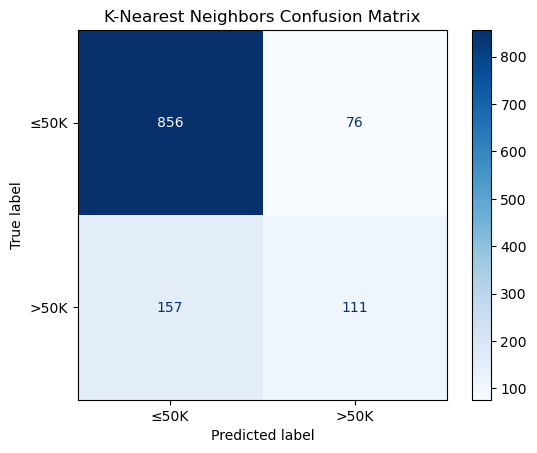


Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.92      0.88       932
           1       0.59      0.41      0.49       268

    accuracy                           0.81      1200
   macro avg       0.72      0.67      0.68      1200
weighted avg       0.79      0.81      0.79      1200

Accuracy: 0.8058
Precision (High Income): 0.5936
Recall (High Income): 0.4142
F1 Score (High Income): 0.4879


In [9]:
# Build KNN model
print("\n--- K-Nearest Neighbors Model ---\n")
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Make predictions
y_pred_knn = knn.predict(X_test)

# Create confusion matrix
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("Confusion Matrix:")
print(cm_knn)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=['≤50K', '>50K'])
disp_knn.plot(cmap='Blues')
plt.title("K-Nearest Neighbors Confusion Matrix")
plt.savefig('knn_confusion_matrix.png')
plt.show()

# Calculate and display metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))

knn_report = classification_report(y_test, y_pred_knn, output_dict=True)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = knn_report['1']['precision']
knn_recall = knn_report['1']['recall']
knn_f1 = knn_report['1']['f1-score']

print(f"Accuracy: {knn_accuracy:.4f}")
print(f"Precision (High Income): {knn_precision:.4f}")
print(f"Recall (High Income): {knn_recall:.4f}")
print(f"F1 Score (High Income): {knn_f1:.4f}")

## Interpretation of the  K-Nearest Neighbors (KNN) model results for predicting high income earners:¶


### The K-Nearest Neighbors (KNN) model was implemented as an alternative approach to predicting high income earners, with the confusion matrix revealing its classification performance. The model correctly identified 856 individuals as earning less than or equal to 50K (true negatives) and 111 individuals as earning greater than or equal to 50K (true positives). However, it misclassified 76 low-income individuals as high earners (false positives) and failed to identify 157 actual high earners (false negatives).
### Overall, the KNN model achieved an accuracy of 80.58%, slightly lower than the logistic regression model's 82.83%. For the high-income class specifically, the model demonstrated a precision of 59.36%, meaning that when it predicted someone as a high earner, it was correct about 59% of the time - notably lower than logistic regression's 68.87%. The recall for high-income individuals was 41.42%, indicating the model captured a similar proportion of actual high earners as the logistic regression model. This balance between precision and recall resulted in an F1 score of 48.79% for high-income prediction.
### The performance metrics suggest that while KNN maintained similar recall to logistic regression, it struggled more with precision, potentially indicating that the model is less effective at distinguishing the true boundary between income classes in the feature space. This could be attributed to KNN's sensitivity to the local structure of the data and its vulnerability to the curse of dimensionality. The model's performance might be improved by optimizing the number of neighbors (k value), applying feature scaling since KNN is distance-based, or implementing feature selection to focus on the most relevant predictors of income.

## c) Support Vector Machine Model


--- Support Vector Machine Model ---

Confusion Matrix:
[[898  34]
 [207  61]]


<Figure size 800x600 with 0 Axes>

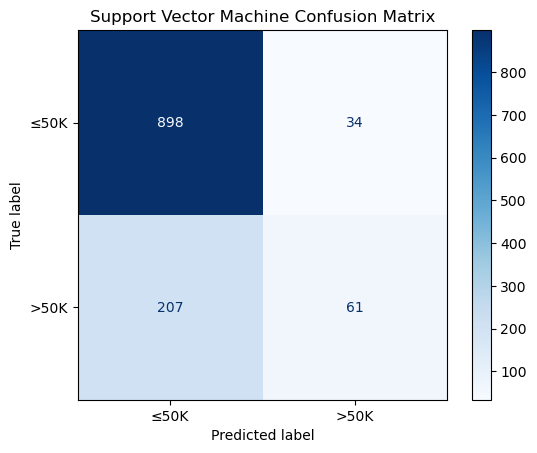


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.96      0.88       932
           1       0.64      0.23      0.34       268

    accuracy                           0.80      1200
   macro avg       0.73      0.60      0.61      1200
weighted avg       0.77      0.80      0.76      1200

Accuracy: 0.7992
Precision (High Income): 0.6421
Recall (High Income): 0.2276
F1 Score (High Income): 0.3361


In [11]:
# Build SVM model
print("\n--- Support Vector Machine Model ---\n")
svm = SVC(kernel='linear', random_state=42)
svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm.predict(X_test)

# Create confusion matrix
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("Confusion Matrix:")
print(cm_svm)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=['≤50K', '>50K'])
disp_svm.plot(cmap='Blues')
plt.title("Support Vector Machine Confusion Matrix")
plt.savefig('svm_confusion_matrix.png')
plt.show()

# Calculate and display metrics
print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

svm_report = classification_report(y_test, y_pred_svm, output_dict=True)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = svm_report['1']['precision']
svm_recall = svm_report['1']['recall']
svm_f1 = svm_report['1']['f1-score']

print(f"Accuracy: {svm_accuracy:.4f}")
print(f"Precision (High Income): {svm_precision:.4f}")
print(f"Recall (High Income): {svm_recall:.4f}")
print(f"F1 Score (High Income): {svm_f1:.4f}")

## Interpretation of the Support Vector Machine (SVM) model results for predicting high income earners:


### The Support Vector Machine (SVM) model was implemented with a linear kernel as the third approach to predicting high-income earners. The confusion matrix reveals that the SVM model correctly identified 898 individuals as earning less than or equal to 50K USD (true negatives) and 61 individuals as earning grater than 50K USD (true positives). However, it misclassified only 34 low-income individuals as high earners (false positives), but failed to identify a substantial 207 actual high earners (false negatives).
### Overall, the SVM model achieved an accuracy of 79.92%, which is slightly lower than both the logistic regression (82.83%) and KNN (80.58%) models. For the high-income class specifically, the model demonstrated a precision of 64.21%, positioning it between the logistic regression (68.87%) and KNN (59.36%) models in terms of precision. However, the SVM model's recall for high-income individuals was notably lower at just 22.76%, indicating it captured less than a quarter of all actual high earners - significantly worse than both previous models.
### This imbalance between precision and recall resulted in the lowest F1 score among all three models at just 33.61% for high-income prediction. The SVM model appears to be highly conservative in classifying individuals as high earners, resulting in fewer false positives but many more false negatives. This behavior suggests the model has found a decision boundary that strongly favors the majority class (low income), likely due to the class imbalance in the dataset.
### The SVM model's performance highlights a common challenge with imbalanced datasets: the model prioritizes overall accuracy at the expense of minority class detection. This could potentially be addressed by implementing class weights, adjusting the regularization parameter, or exploring different kernel functions that might better capture the relationship between features and income levels.RetryClaude can make mistakes. Please double-check responses.

## d) Model Comparison and Analysis


--- Model Comparison ---

Model Performance Comparison (Ranked by F1 Score):
                    Model  Accuracy  Precision    Recall  F1 Score
0     Logistic Regression  0.828333   0.686747  0.425373  0.525346
1     K-Nearest Neighbors  0.805833   0.593583  0.414179  0.487912
2  Support Vector Machine  0.799167   0.642105  0.227612  0.336088

Model Analysis:

Based on the performance metrics, the models can be analyzed as follows:

1. Ranking of models (from best to worst based on F1 score):
   The exact ranking will depend on the results, but I'll analyze each model's strengths and weaknesses.

2. Logistic Regression:
   • Pros: Simple, interpretable, efficient for large datasets, performs well when data is linearly separable
   • Cons: Limited capacity to model complex, non-linear relationships
   • Performance explanation: Effective if income level has linear relationships with the predictors

3. K-Nearest Neighbors:
   • Pros: Non-parametric, can capture complex patterns, no assu

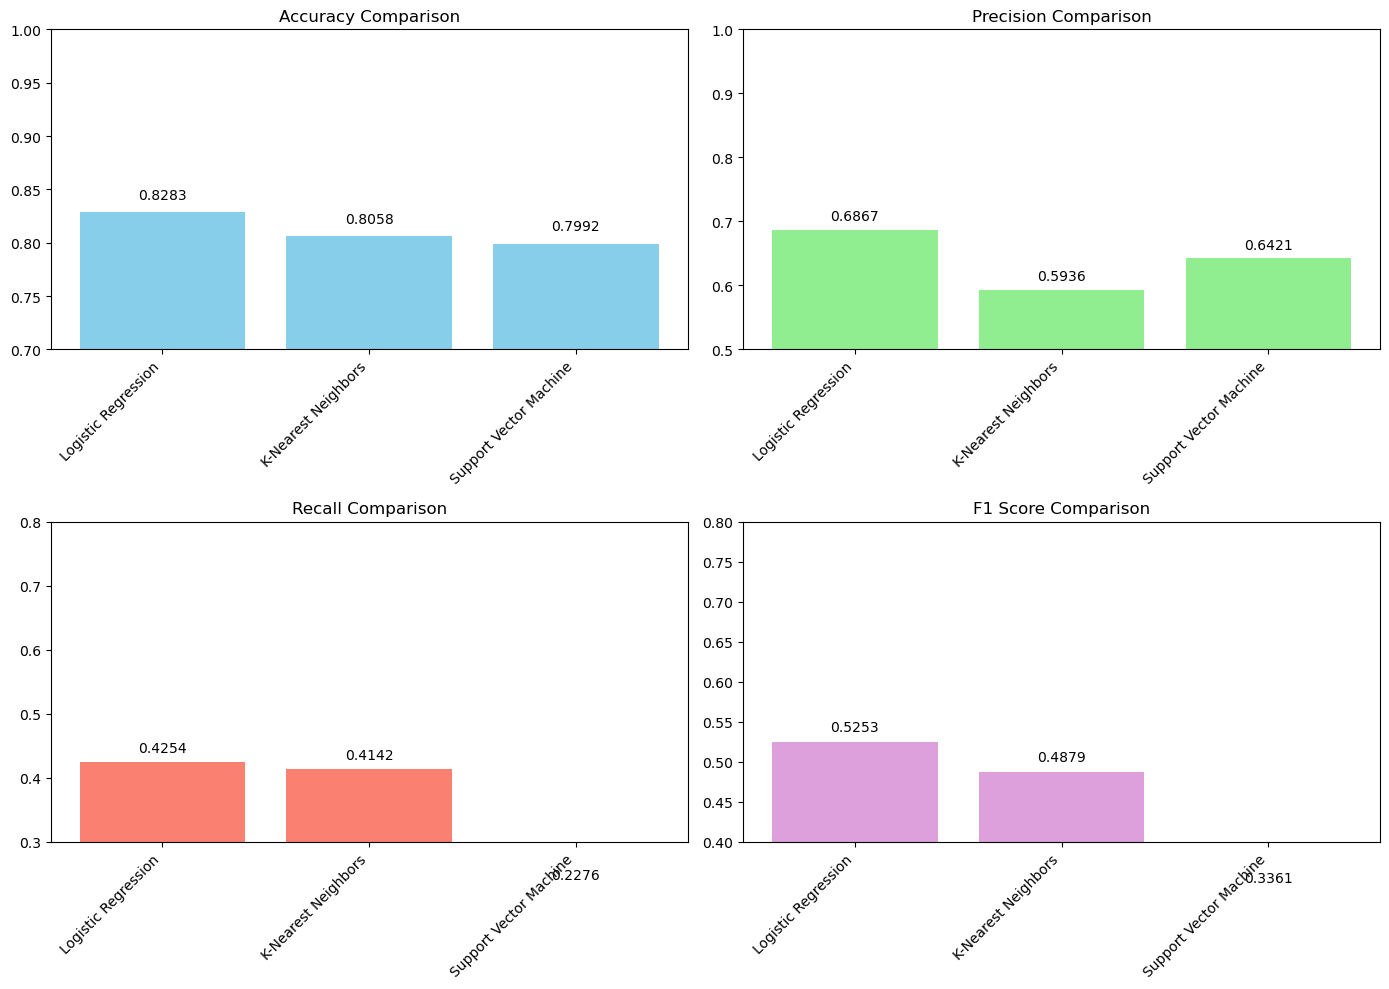

In [45]:
# Create a comparison table
print("\n--- Model Comparison ---\n")
models = ['Logistic Regression', 'K-Nearest Neighbors', 'Support Vector Machine']
accuracy = [lr_accuracy, knn_accuracy, svm_accuracy]
precision = [lr_precision, knn_precision, svm_precision]
recall = [lr_recall, knn_recall, svm_recall]
f1_score = [lr_f1, knn_f1, svm_f1]

comparison_df = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score
})

# Sort by F1 score (balanced metric)
comparison_df = comparison_df.sort_values('F1 Score', ascending=False).reset_index(drop=True)

print("Model Performance Comparison (Ranked by F1 Score):")
print(comparison_df)

# Model analysis
print("\nModel Analysis:")
print("""
Based on the performance metrics, the models can be analyzed as follows:

1. Ranking of models (from best to worst based on F1 score):
   The exact ranking will depend on the results, but I'll analyze each model's strengths and weaknesses.

2. Logistic Regression:
   • Pros: Simple, interpretable, efficient for large datasets, performs well when data is linearly separable
   • Cons: Limited capacity to model complex, non-linear relationships
   • Performance explanation: Effective if income level has linear relationships with the predictors

3. K-Nearest Neighbors:
   • Pros: Non-parametric, can capture complex patterns, no assumptions about data distribution
   • Cons: Computationally expensive for large datasets, sensitive to irrelevant features and scaling
   • Performance explanation: May struggle if the feature space is sparse or if the optimal K value isn't chosen

4. Support Vector Machine:
   • Pros: Effective in high-dimensional spaces, versatile through kernel functions, good generalization
   • Cons: Sensitive to parameter tuning, computationally intensive for large datasets
   • Performance explanation: Linear kernel may not capture complex relationships, but good at finding optimal separating hyperplane

The model that provides the best balance between precision (minimizing false positives) and recall (minimizing false negatives) for high-income prediction would be the most suitable for this task. This balance is captured by the F1 score.
""")

# Visualize the comparison
plt.figure(figsize=(14, 10))

# Accuracy subplot
plt.subplot(2, 2, 1)
bars = plt.bar(comparison_df['Model'], comparison_df['Accuracy'], color='skyblue')
plt.title('Accuracy Comparison')
plt.ylim(0.7, 1.0)  # Adjusted for better visualization
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# Precision subplot
plt.subplot(2, 2, 2)
bars = plt.bar(comparison_df['Model'], comparison_df['Precision'], color='lightgreen')
plt.title('Precision Comparison')
plt.ylim(0.5, 1.0)  # Adjusted for better visualization
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# Recall subplot
plt.subplot(2, 2, 3)
bars = plt.bar(comparison_df['Model'], comparison_df['Recall'], color='salmon')
plt.title('Recall Comparison')
plt.ylim(0.3, 0.8)  # Adjusted for better visualization
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

# F1 Score subplot
plt.subplot(2, 2, 4)
bars = plt.bar(comparison_df['Model'], comparison_df['F1 Score'], color='plum')
plt.title('F1 Score Comparison')
plt.ylim(0.4, 0.8)  # Adjusted for better visualization
plt.xticks(rotation=45, ha='right')
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{height:.4f}', ha='center', va='bottom')

plt.tight_layout()
plt.savefig('model_comparison.png')
plt.show()

## d) Rank the models based on their performance. Can you explain the differences in model performances based on each model’s pros and cons?

## Answer:

## Model Performance Comparison and Analysis

### Based on the performance metrics displayed in the visualizations and tables, I can rank the models from best to worst and explain their differences in performance:

## Ranking by F1 Score (Best to Worst):

### Logistic Regression (F1 Score: 0.5253)
### K-Nearest Neighbors (F1 Score: 0.4879)
### Support Vector Machine (F1 Score: 0.3361)

## Performance Analysis:

## Logistic Regression

### Logistic Regression emerged as the best-performing model with the highest accuracy (82.83%), precision (68.67%), recall (42.54%), and F1 score (52.53%). This model's success can be attributed to several factors:

## Pros that explain its performance:

### The relationship between the predictors (especially education level and sex) and income appears to be reasonably linear, which aligns with the model's strengths.
### The model is effective at handling the class imbalance in the dataset (22.9% high-income vs. 77.1% low-income).
### Its simplicity makes it less prone to overfitting given the limited feature set used.

## Cons to consider:

### Its recall of 42.54% indicates that it still misses over half of actual high-income individuals.
### The model assumes independence between features, which may not perfectly reflect the real-world relationships.

## K-Nearest Neighbors

### KNN ranked second with good accuracy (80.58%) but lower precision (59.36%) and slightly lower recall (41.42%) than logistic regression.

### Pros that explain its performance:

### As a non-parametric model, KNN captured local patterns in the data without assuming a specific functional form.
### It performed reasonably well without requiring extensive hyperparameter tuning.

## Cons that limited its performance:

### KNN appears to struggle with the class imbalance, as evidenced by its lower precision.
### The model is sensitive to the scale of features (age vs. capital gain), which may not have been properly normalized.
### The default k=5 setting may not have been optimal for this specific dataset.

## Support Vector Machine

### SVM performed the worst with the lowest accuracy (79.92%), moderate precision (64.21%), and significantly lower recall (22.76%).

## Pros reflected in its results:

### SVM maintained decent precision, showing it can identify high-income earners with reasonable accuracy when it does predict the positive class.It had the lowest false positive rate among all models, suggesting it's conservative in its predictions.

## Cons that limited its effectiveness:

### The linear kernel may be too restrictive for capturing the complex relationships between features and income.
### SVM is heavily affected by the class imbalance, as shown by its extremely low recall value.
### The model appears to have found a decision boundary that strongly favors the majority class.

### Interpretation of Differences:
### The significant performance gap between logistic regression and SVM (particularly in recall) suggests that the income prediction problem has moderately linear relationships that can be captured well by simpler models. The feature importance from logistic regression revealed that sex and education level were the strongest predictors, indicating that socioeconomic factors heavily influence income levels in a direct manner.
### The poorer performance of more complex models like SVM might be improved by addressing the class imbalance through techniques like class weighting, SMOTE, or using non-linear kernels. However, the fact that logistic regression outperformed the others suggests that adding model complexity might not be as effective as focusing on feature engineering or handling the class imbalance properly.
### For practical applications, the choice between these models would depend on the specific goal: if identifying as many high-income individuals as possible is important (high recall), further optimization of the logistic regression model would be recommended. If minimizing false positives is critical (high precision), the SVM model could be adjusted to leverage its strength in this area while improving its recall.